In [1]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [2]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering = catering_service_tool(query="highest-rated catering service in Gotham City")            
  print(highest_rated_catering)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 0: Duration 4.00 seconds| Input tokens: 2,077 | Output tokens: 63]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering = catering_service_tool(query="highest-rated catering service in Gotham City")            
  final_answer(highest_rated_catering)                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 1: Duration 4.67 seconds| Input tokens: 4,320 | Output tokens: 142]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [3]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_party_theme = superhero_party_theme_generator(category="villain masquerade")                             
  print(villain_party_theme)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 0: Duration 4.40 seconds| Input tokens: 2,113 | Output tokens: 71]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 5.25 seconds| Input tokens: 4,411 | Output tokens: 159]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [5]:
from dotenv import load_dotenv, find_dotenv
import os

load_dotenv(find_dotenv())



party_theme_tool.push_to_hub("sagarnildass/catering_service_tool", token=os.getenv('HF_TOKEN'))

README.md:   0%|          | 0.00/241 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/sagarnildass/catering_service_tool/commit/e30556224b52b06b58b655f6cd332a1bc0f48a9e', commit_message='Upload tool', commit_description='', oid='e30556224b52b06b58b655f6cd332a1bc0f48a9e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/sagarnildass/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='sagarnildass/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor, with made-up superheroes in high-res,               
  photorealistic style. The party is filled with elegant decorations, gourmet food, and high-tech gadgets. The     
  superheros are dressed in unique, colorful costumes with superhero masks, capes, and futuristic weapons. Wayne   
  Manor is illuminated with elegant chandeliers, and the guests are mingling in a grand ballroom with a disco      
  ball in the center. The atmosphere is vibrant and electric, with drinks and snacks served by robotic butlers.    
  The walls are adorned with paintings of classic Batman villains and heroes."                                     
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FE0B4B07490>

[Step 0: Duration 0.79 seconds| Input tokens: 2,107 | Output tokens: 188]

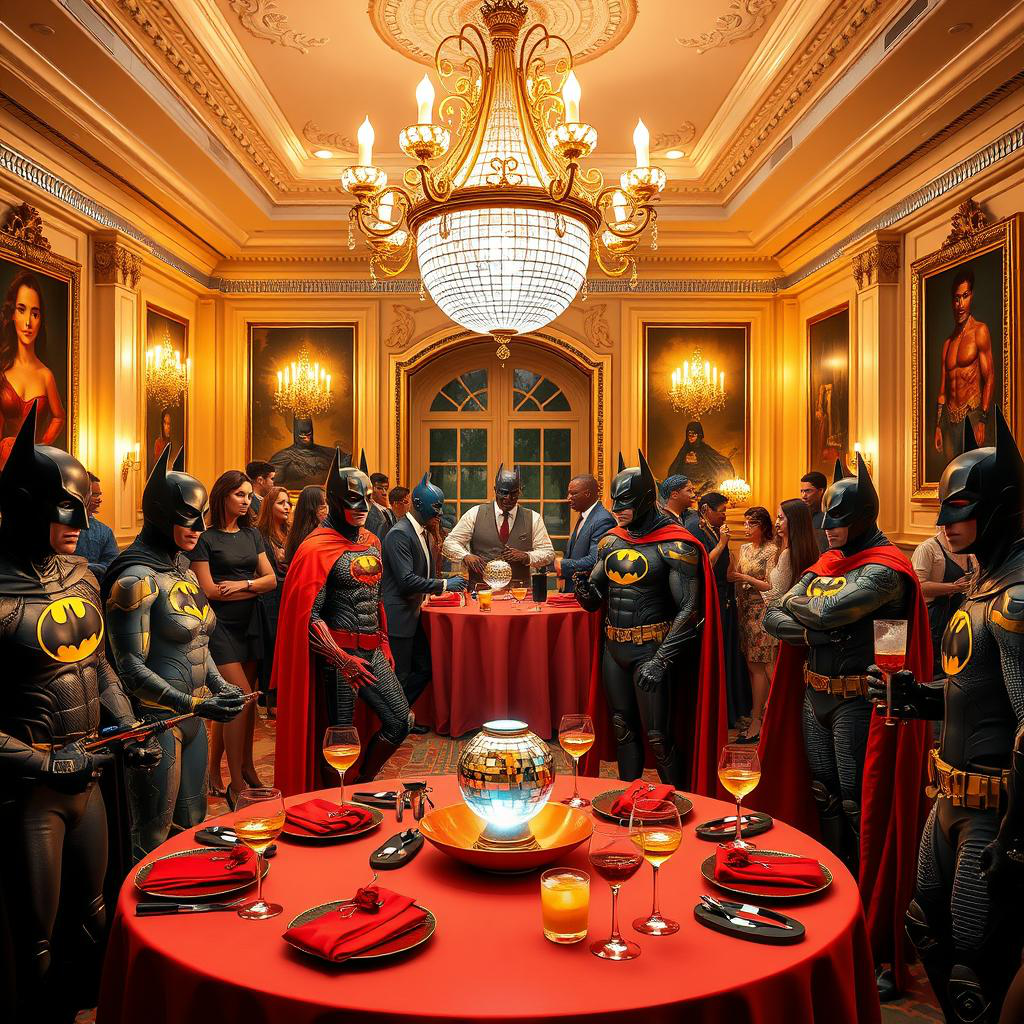

In [7]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [9]:
#!pip install gradio_client

In [10]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = ("A grand superhero-themed party at Wayne Manor, illuminated by the moonlight shining through  
  the grand windows. "                                                                                             
                     "Alfred, in his butler's tuxedo, oversees a luxurious gala with style and grace. The guests   
  are dressed in amazing superhero-themed costumes, "                                                              
                     "adding to the vibrant atmosphere. Bat-shaped balloons and blue streamers are hung, while a   
  giant banner reads 'Justice League Gala'. "                                                                      
                     "A replica of the Bat-Signal is displayed near the entrance, and the party features a buffet  
  with a wide variety of foods. Alfred is busily"                                                                  
                     " greeting guests and ensuring everything runs smoothly.")                                    
                                                                                                                   
  # Generating the image                                                                                           
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/fb8ba3f0c2b6789e31814aee43315b6452d763dfd20fc3c2a86286909fcbcedf/image.webp

[Step 0: Duration 57.29 seconds| Input tokens: 2,104 | Output tokens: 201]

'/tmp/gradio/fb8ba3f0c2b6789e31814aee43315b6452d763dfd20fc3c2a86286909fcbcedf/image.webp'

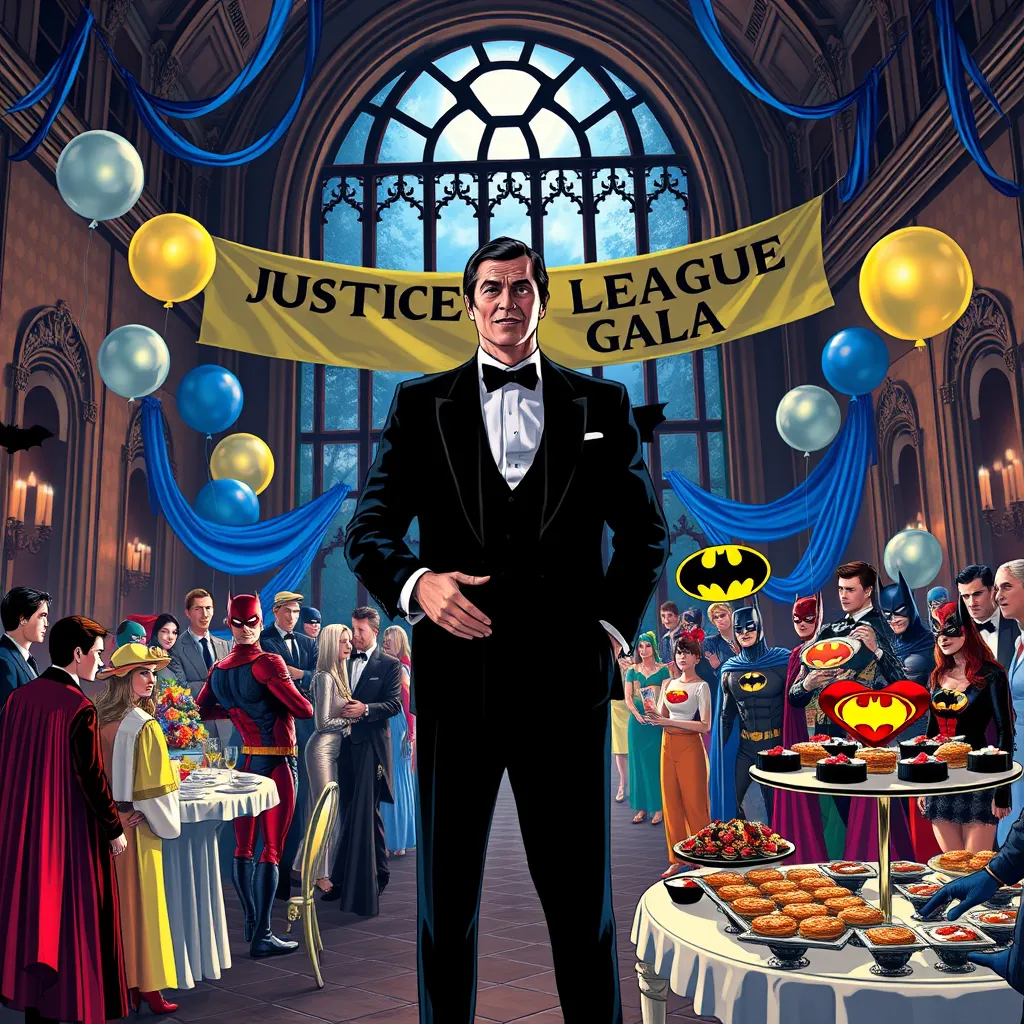

In [13]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/fb8ba3f0c2b6789e31814aee43315b6452d763dfd20fc3c2a86286909fcbcedf/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [15]:
#!pip install langchain-community google-search-results

In [21]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

os.environ["SERPAPI_API_KEY"] = os.getenv('SERPAPI_API_KEY')

In [22]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_search = search(tool_input="luxury superhero-themed entertainment ideas")                   
  print(luxury_entertainment_search)                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Jun 11, 2019 - Awesome ideas for your next Superhero Party | Decorations | Food | Games | Activities | Toys | 
Costumes | Crafts. See more ideas about ...', "For Amazon's new series The Tick, custom props and decor 
incorporated superhero nuances in a playful way.", 'Batman Birthday Party Candy Buffet Ideas | Little Dimple 
Designs · Captain America Deluxe Boys Costume · Marvel Carnage Morphsuit Mens Costume.', 'LED Battery Operated 
Lights · Basket Filler · Superhero Mini Buttons (pins) · Fringed Door Curtains · Large Superhero Signs · Small 
Superhero Signs ...', 'Discover your inner superhero in our dress-up wardrobe and grab your favorite mask, cape, 
dress and accessories to let your hidden superpowers shine! They have it all and organized a perfect party 
experience in such a friendly and welcoming way, even with all my special game requirements.', 'Luxury Sleeveless 
Party Wear Dresses · Gothic High Crown Costume ... Avenger Birthday Party Ideas · Avengers Birthday Theme Decor · 
Marvel ...', "Our children's Superhero Party Entertainment includes a range of interactive games and activities, 
such as superhero training and bubble popping, musical games.", 'DIY Superhero Party Decorations from Dollar Tree 
under $40! Bash Besties · 16K views ; PRO 5 SPIDER-MAN Team || Help Everyone On Kid Spider ...']

Out: None

[Step 0: Duration 18.41 seconds| Input tokens: 2,082 | Output tokens: 70]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  refined_search_results = search(tool_input="luxury superhero-themed event entertainment ideas")                  
  print(refined_search_results)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
["Here's a look at different ideas for adding cartoon-like visuals and references to caped crusaders at your next 
affair.", 'Dec 16, 2013 - Explore Tablescapes By Design\'s board "SUPER HERO THEMED EVENTS" on Pinterest. See more 
ideas about superhero birthday, superhero birthday ...', 'From decor ideas, party foods, and costume ideas to 
superhero-themed activities, we have all of your party needs covered.', 'For a 40th birthday party in Napa Valley 
in March, Glow Events gave the superhero theme a black-tie makeover. To create a grand entrance for ...', 'Discover
your inner superhero in our dress-up wardrobe and grab your favorite mask, cape, dress and accessories to let your 
hidden superpowers shine! They have it all and organized a perfect party experience in such a friendly and 
welcoming way, even with all my special game requirements.', "Looking for creative ideas for an adult superhero 
party? You've come to the right place! Check out the centerpieces, diy photo booth and ...", '55000/- To make the 
event more fun and thrilling, we suggest a few add-on activities like the VR Gaming, Thor hammer activity and rock 
wall climbing. MICEkart ...', 'Transform your event into an action-packed superhero party with our dynamic 
decorations, thrilling activities, and themed treats.', 'Include activities like crawling through tunnels, jumping 
over “buildings” (boxes), balancing on a “tightrope” (rope or tape), and throwing ...']

Out: None

[Step 1: Duration 6.07 seconds| Input tokens: 4,607 | Output tokens: 150]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = {                                                                                   
      "live_performances": [                                                                                       
          "Caped Crusaders grand entrance",                                                                        
          "VR Gaming",                                                                                             
          "Thor hammer activity",                                                                                  
          "Rock wall climbing"                                                                                     
      ],                                                                                                           
      "interactive_experiences": [                                                                                 
          "Crawling through tunnels",                                                                              
          "Jumping over 'buildings' (boxes)",                                                                      
          "Balancing on a 'tightrope' (rope or tape)",                                                             
          "Throwing objects"                                                                                       
      ]                                                                                                            
  }                                                                                                                
                                                                                                                   
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'live_performances': ['Caped Crusaders grand entrance', 'VR Gaming', 'Thor hammer activity', 
'Rock wall climbing'], 'interactive_experiences': ['Crawling through tunnels', "Jumping over 'buildings' (boxes)", 
"Balancing on a 'tightrope' (rope or tape)", 'Throwing objects']}

[Step 2: Duration 11.68 seconds| Input tokens: 7,614 | Output tokens: 392]

{'live_performances': ['Caped Crusaders grand entrance',
  'VR Gaming',
  'Thor hammer activity',
  'Rock wall climbing'],
 'interactive_experiences': ['Crawling through tunnels',
  "Jumping over 'buildings' (boxes)",
  "Balancing on a 'tightrope' (rope or tape)",
  'Throwing objects']}

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉